<h2 align='center'><a>Understanding the business problem</h2>

##### Central Banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints.

* Bank users give ratings and write reviews about services on central bank websites. These reviews and ratings help to banks evaluate services provided and take neccesory action to improve customer services. While ratings are useful to cinvey the overall experience, they do not convey the context which led a reviewer to that experience.

* If we look at only the rating , it is difficult to guess why the user rated the service as 4 star. However after reading the review it is not difficult to identify that the review talks about the good 'service' and 'expectations'.

##### The objective of this case study is to analyze customer reviews and predict customer satisfaction  with the reviews.
- Data processing 
- Key positive words/Negative words (most frequent words)
- Classification of reviews into Positive, Negative and Neutral
- Identify key themes of problems (using clustering, topic models)
- Predicting star ratings using reviews
- Perform intent analysis

#### <a>Importing the necessary library

In [1]:
import pandas as pd             
import numpy as np              

import seaborn as sns           

import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

import nltk            
import string          
import re              

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False          

#### <a>Import the data

In [2]:
Bank_Reviews = pd.read_excel('D:\\Python\\Advance\\5. Bank Reviews-Complaints Analysis\\BankReviews.xlsx')

In [3]:
BankReviews=Bank_Reviews.copy()

<h2 align='center'><a>Exploratory Data Analysis(EDA)</h2>

#### <a>Making friendship with data after importing.

In [4]:
BankReviews.head()  

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [5]:
BankReviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.9+ KB


In [6]:
BankReviews.shape 

(505, 4)

In [7]:
BankReviews.columns

Index(['Date', 'Stars', 'Reviews', 'BankName'], dtype='object')

In [8]:
BankReviews.isnull().sum() ## Missing value within the columns

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

### <a> Text Preprocessing

In [9]:
BankReviews.drop(['Date','BankName'],axis=1,inplace=True)

In [10]:
BankReviews.shape

(505, 2)

In [11]:
BankReviews.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


In [12]:
Com=BankReviews.groupby('Stars').count()
Com

,Reviews
Stars,
1,95
5,410


Text(0, 0.5, 'Review')

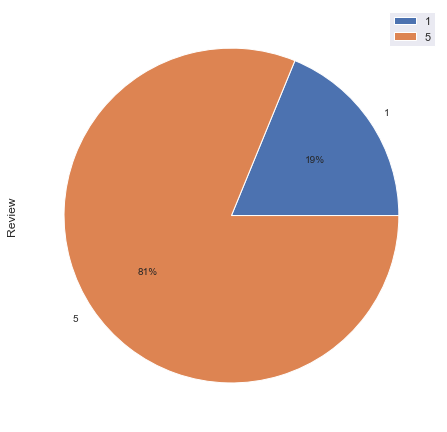

In [13]:
### Pie Chart Comparision 

Com.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Review') ### Most of them  review in positive.

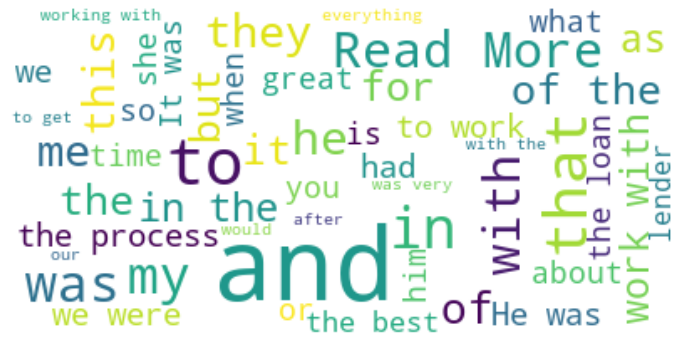

In [14]:
## Most common word used during the review.
from wordcloud import WordCloud

N1=' '.join(BankReviews['Reviews'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(N1)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
### Copy of Bank Review

In [16]:
Ba_Rev=BankReviews.copy()

#### <a> Test in Lowercase

In [17]:
def text_lowercase(text):
    return text.lower()

In [18]:
Ba_Rev['Reviews'] = BankReviews['Reviews'].apply(lambda x: text_lowercase(x))

####  <a>Remove Numbers

In [19]:
#### Convert the numbers into words.

# import the inflect library 
import inflect                

p = inflect.engine()

# convert number into words 
def convert_number(text): 
    
    # split string into list of words 
    temp_str = text.split()
    
    # initialise empty list 
    new_string = []
    
    for word in temp_str:
        
        # if word is a digit, convert the digit to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        
        # append the word as it is 
        else: 
            new_string.append(word) 
            
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    
    return temp_str 

In [20]:
Ba_Rev['Reviews'] = Ba_Rev['Reviews'].apply(lambda x: convert_number(x))

#### <a> Remove Punctuation

In [21]:
# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [22]:
Ba_Rev['Reviews'] = Ba_Rev['Reviews'].apply(lambda x: remove_punctuation(x))

#### <a> Remove Whitespace

In [23]:
# remove whitespace from text (Remove all the white spaces in a string)
def remove_whitespace(text): 
    return  " ".join(text.split())

In [24]:
Ba_Rev['Reviews'] = Ba_Rev['Reviews'].apply(lambda x: remove_whitespace(x))


#### <a>Remove Stopwords

In [25]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

In [26]:
Ba_Rev['Reviews'] = Ba_Rev['Reviews'].apply(lambda x: remove_stopwords(x))

#### <a>Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

# lemmatize string 
def lemmatize_word(text): 
    
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos = 'v') for word in text] 
    
    return lemmas 

In [28]:
Ba_Rev['Reviews'] = Ba_Rev['Reviews'].apply(lambda x: lemmatize_word(x))

In [29]:
Ba_Rev['Reviews'].head()

0    [great, job, wyndham, capital, person, profess...
1    [matthew, richardson, professional, helpful, h...
2    [past, experience, wyndham, mortgage, would, w...
3    [deal, brad, thomka, begin, start, stressful, ...
4    [cant, express, grateful, support, zach, provi...
Name: Reviews, dtype: object

### <a>Most Common Word

In [30]:
Ba_Rev.loc[Ba_Rev.Stars==5].Reviews

0      [great, job, wyndham, capital, person, profess...
1      [matthew, richardson, professional, helpful, h...
2      [past, experience, wyndham, mortgage, would, w...
3      [deal, brad, thomka, begin, start, stressful, ...
4      [cant, express, grateful, support, zach, provi...
                             ...                        
486    [excellent, service, rc, stay, top, everythign...
487    [complete, everything, time, get, us, quick, c...
488    [brad, helpful, entire, process, first, time, ...
489    [recommend, everyone, know, nasb, dallas, good...
490    [refinance, process, dream, speak, dallas, cho...
Name: Reviews, Length: 410, dtype: object

#### Word Cloud of the positive statement.

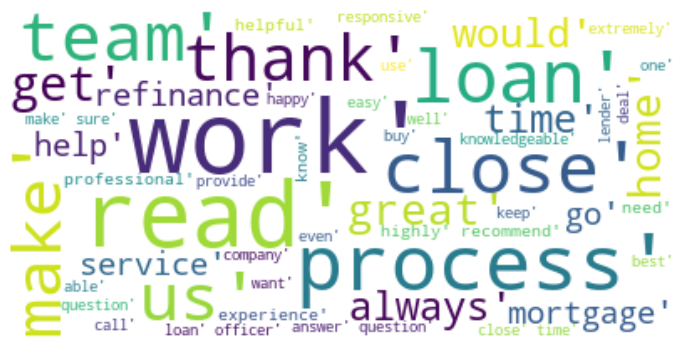

In [31]:
from wordcloud import WordCloud

T1=' '.join(Ba_Rev.loc[Ba_Rev.Stars==5].Reviews.astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(T1)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
Ba_Rev.loc[Ba_Rev.Stars==1].Reviews

17     [worst, experience, ever, like, never, go, pro...
18     [good, rate, frustrate, process, constant, del...
19     [upfront, learn, mistake, trust, loan, officer...
20     [initially, mortgage, broker, friendly, assert...
21     [initially, mortgage, broker, friendly, assert...
                             ...                        
500    [never, write, review, time, prevent, anyone, ...
501    [start, bob, g, run, credit, check, without, k...
502    [horrible, experience, excellent, credit, plen...
503    [rep, extremely, professional, friendly, helpf...
504    [work, loan, consultant, nasb, tell, would, gi...
Name: Reviews, Length: 95, dtype: object

#### Word Cloud of the negative statement.

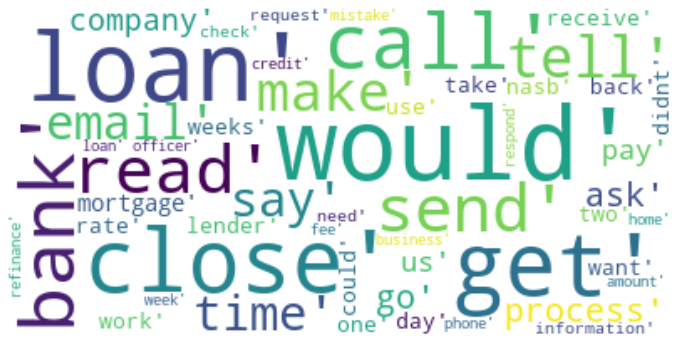

In [33]:
from wordcloud import WordCloud

T2=' '.join(Ba_Rev.loc[Ba_Rev.Stars==1].Reviews.astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(T2)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
#### Overall Comment-Word Cloud

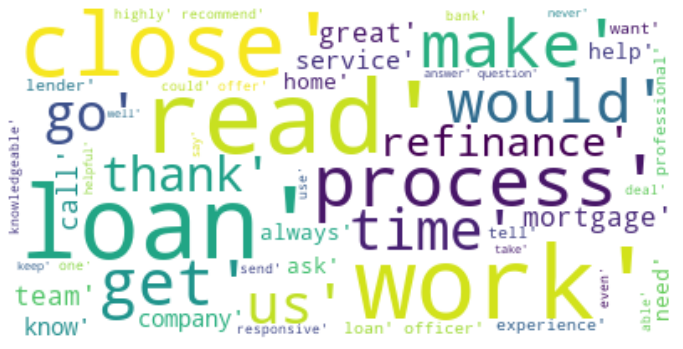

In [35]:
from wordcloud import WordCloud

T3=' '.join(Ba_Rev.Reviews.astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(T3)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

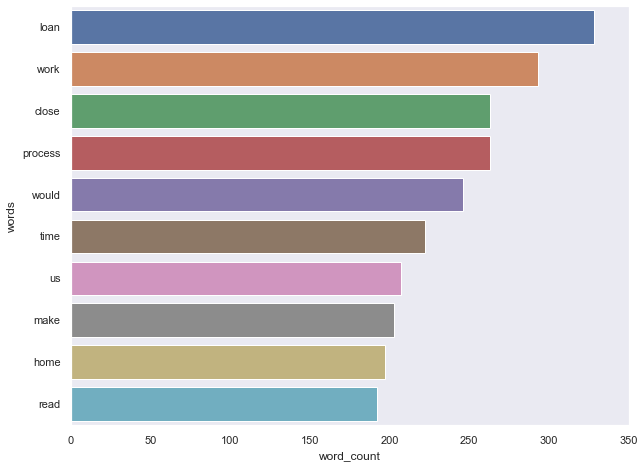

In [36]:
# Creating the Bag of Words model 
word2count = {}

for data in Ba_Rev.Reviews: 
    
    for word in data:
        
        if word not in word2count.keys(): 
            word2count[word] = 1
            
        else: 
            word2count[word] += 1    
            
count_df = pd.DataFrame(word2count.items(), columns = ['words', 'word_count'])
count_df = count_df.sort_values('word_count', ascending = False).reset_index(drop = True)
freqwords = count_df.head(10)

sns.barplot(x = 'word_count', y = 'words', data = freqwords)

## <a>Sentiment Based Analysis

In [37]:
# Importing required library to perform sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [39]:
analyser = SentimentIntensityAnalyzer()

def sentiment_positive(sentence):
    senti = analyser.polarity_scores(sentence)
    return senti['pos']

def sentiment_negative(sentence):
    senti = analyser.polarity_scores(sentence)
    return senti['neg']

def sentiment_neutral(sentence):
    senti = analyser.polarity_scores(sentence)
    return senti['neu']

def sentiment_compound(sentence):
    senti = analyser.polarity_scores(sentence)
    return senti['compound']

In [40]:
count_df['Positive'] = count_df['words'].apply(sentiment_positive)
count_df['Negative'] = count_df['words'].apply(sentiment_negative)
count_df['Neutral'] = count_df['words'].apply(sentiment_neutral)
count_df['Compound'] = count_df['words'].apply(sentiment_compound)

In [41]:
count_df.head()

,words,word_count,Positive,Negative,Neutral,Compound
0,loan,328,0.0,0.0,1.0,0.0
1,work,293,0.0,0.0,1.0,0.0
2,close,263,0.0,0.0,1.0,0.0
3,process,263,0.0,0.0,1.0,0.0
4,would,246,0.0,0.0,1.0,0.0


In [42]:
Word_Analy=count_df[['words','Positive','Negative','Neutral','Compound']]
Word_Analy.head()

,words,Positive,Negative,Neutral,Compound
0,loan,0.0,0.0,1.0,0.0
1,work,0.0,0.0,1.0,0.0
2,close,0.0,0.0,1.0,0.0
3,process,0.0,0.0,1.0,0.0
4,would,0.0,0.0,1.0,0.0


In [43]:
Vis=Word_Analy.groupby('words').sum().sum()
Vis

Positive     247.0000
Negative     133.0000
Neutral     1776.0000
Compound      52.5297
dtype: float64

Text(0, 0.5, 'Review')

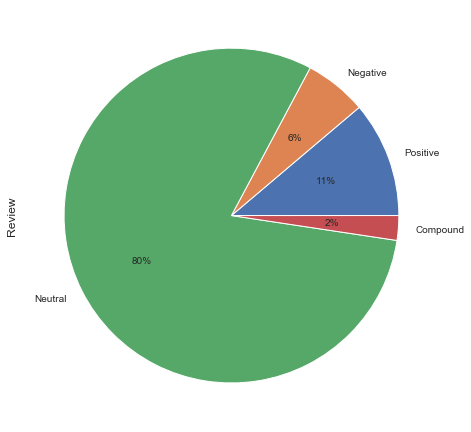

In [44]:
Vis.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Review')

#### Reviews-based classification

In [45]:
BankReviews.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


In [46]:
BankReviews['Positive'] = BankReviews['Reviews'].apply(sentiment_positive)
BankReviews['Negative'] = BankReviews['Reviews'].apply(sentiment_negative)
BankReviews['Neutral'] = BankReviews['Reviews'].apply(sentiment_neutral)
BankReviews['Compound'] = BankReviews['Reviews'].apply(sentiment_compound)


In [47]:
BankReviews.head()

,Stars,Reviews,Positive,Negative,Neutral,Compound
0,5,"Great job, Wyndham Capital! Each person was pr...",0.297,0.000,0.703,0.8011
1,5,Matthew Richardson is professional and helpful...,0.297,0.000,0.703,0.8516
2,5,We had a past experience with Wyndham Mortgage...,0.206,0.000,0.794,0.9595
3,5,We have been dealing with Brad Thomka from the...,0.226,0.018,0.756,0.9818
4,5,I can't express how grateful I am for the supp...,0.099,0.040,0.861,0.5569


#### <a>Define X and Y

In [48]:
X,y=BankReviews.Reviews,BankReviews.Stars

In [49]:
# Pickling the dataset

import pickle
with open('Review.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('sent.pickle','wb') as f:
    pickle.dump(y,f)

In [50]:
# Unpickling dataset
X_in = open('Review.pickle','rb')
y_in = open('sent.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [51]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [52]:
from nltk.stem import WordNetLemmatizer
# sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

#### <a>Creating Tf - Idf model

In [53]:

# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 3000, min_df = 0.05, max_df = 0.95, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [54]:
X.shape

(505, 137)

#### <a>Apply Logistic regression

In [55]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=.2,
                                              random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### <a>Model Accuracy Evaluation

In [57]:
#Evalution of train and test accuracy

from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.9207920792079208
train_accuracy:  0.9183168316831684


In [58]:
train_roc_auc = metrics.roc_auc_score(test_y, logreg.predict(test_x))
print('Roc Auc Score of testing dataset: ', train_roc_auc)

test_roc_auc = metrics.roc_auc_score(train_y,logreg.predict(train_x))
print('Roc Auc Score of training dataset: ', test_roc_auc)

Roc Auc Score of testing dataset:  0.8095238095238095
Roc Auc Score of training dataset:  0.7875102375102376


In [59]:
# Creating a confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(test_y,logreg.predict(test_x), [1,5] )
cm

array([[13,  8],
       [ 0, 80]], dtype=int64)

Text(0.5, 11.0, 'Predicted label')

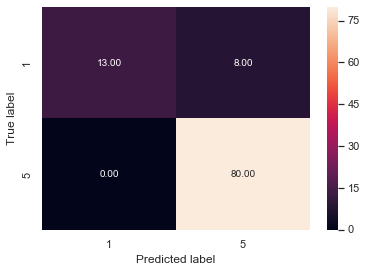

In [60]:
# Creating a heatmap

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### <a>Final Prediction

In [61]:
#Concatenating final prediction with original data set(all obersvations):

pred_st=pd.DataFrame(logreg.predict(X),columns=['predicted_stars'])
  
file = pd.concat([Bank_Reviews, pred_st], axis=1)

file.head(10)

,Date,Stars,Reviews,BankName,predicted_stars
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,5
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,5
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,5
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,5
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,5
5,2016-12-20,5,I had the pleasure of working with Wyndham Cap...,Wyndham Capital Mortgage,5
6,2017-12-17,5,My experience with Mattison was beyond greatly...,Wyndham Capital Mortgage,5
7,2016-08-16,5,Patrick answered all my questions by email imm...,Wyndham Capital Mortgage,5
8,2017-09-04,5,I loved working with this group of people! The...,Wyndham Capital Mortgage,5
9,2016-03-22,5,Great web interface for both the loan applicat...,Wyndham Capital Mortgage,5


*******************************************************END********************************************************************

<center> <H1> END